In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
data = pd.read_csv('data/pacific_post2003.csv')

In [106]:
# 2 separate bars next to eachother that i can duplicate for both categorical models

def plot_grouped_bar(actual, predicted, categories, title, xlabel, ylabel):
    df = pd.DataFrame({'Actual': actual, 'Predicted': predicted})
    
    actual_counts = df['Actual'].value_counts().reindex(categories, fill_value=0)
    predicted_counts = df['Predicted'].value_counts().reindex(categories, fill_value=0)
    
    bar_width = 0.35
    r1 = np.arange(len(categories))
    r2 = [x + bar_width for x in r1]

    plt.figure(figsize=(12, 7))
    plt.bar(r1, actual_counts, color='blue', width=bar_width, edgecolor='gray', label='Actual')
    plt.bar(r2, predicted_counts, color='orange', width=bar_width, edgecolor='gray', label='Predicted')

    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.title(title)
    plt.legend()

    plt.show()

## Classifying the status of the storm

In [86]:
data.dropna(inplace=True)
data['Status'] = data['Status'].str.strip()

In [87]:
label_encoder = LabelEncoder()
data['Status_Encoded'] = label_encoder.fit_transform(data['Status'])

In [89]:
features = data[['Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure']]
target = data['Status_Encoded']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=420)

In [90]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9154929577464789
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        40
           1       1.00      0.80      0.89         5
           2       0.99      1.00      0.99       264
           3       0.89      0.84      0.86       365
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           8       0.77      0.83      0.80       204
           9       0.97      1.00      0.98       397

    accuracy                           0.92      1278
   macro avg       0.82      0.78      0.80      1278
weighted avg       0.91      0.92      0.91      1278



c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

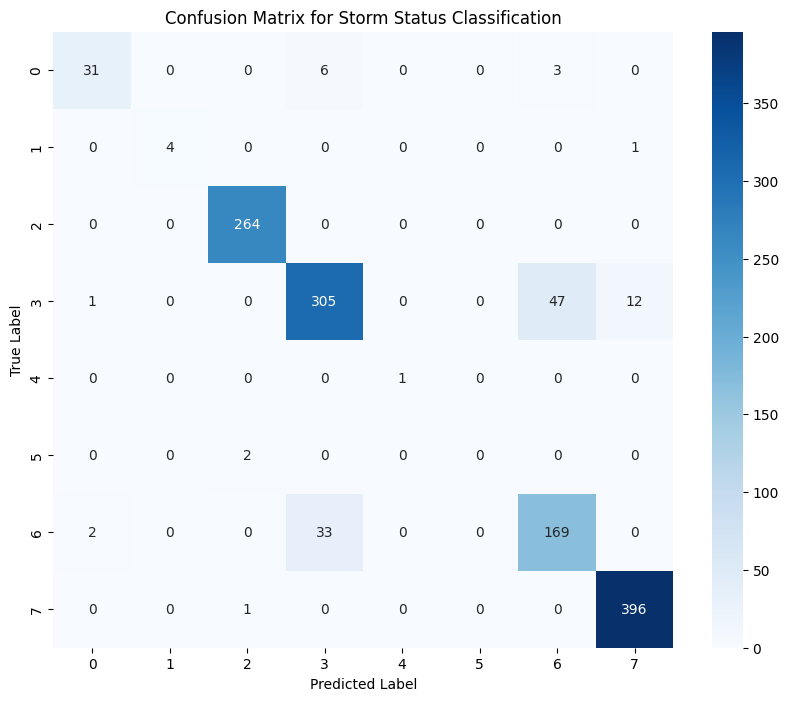

In [92]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Storm Status Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

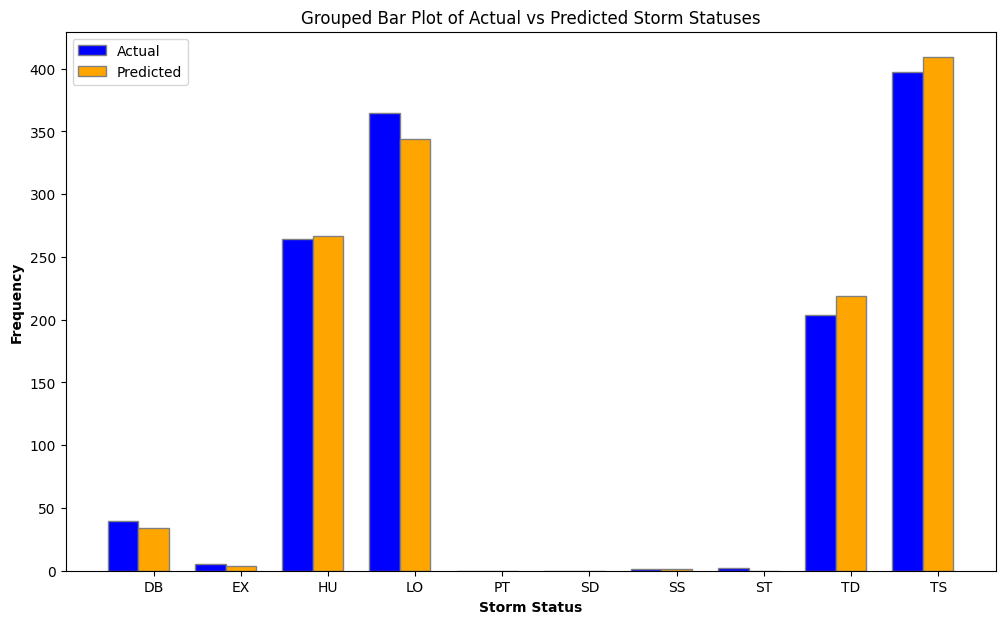

In [107]:
plot_grouped_bar(
    actual=label_encoder.inverse_transform(y_test),
    predicted=label_encoder.inverse_transform(y_pred),
    categories=label_encoder.classes_,
    title='Grouped Bar Plot of Actual vs Predicted Storm Statuses',
    xlabel='Storm Status',
    ylabel='Frequency'
)

## Hurricane Categorization

In [93]:
def categorize_hurricane(wind_speed):
    if wind_speed <= 82:
        return 1
    elif wind_speed <= 95:
        return 2
    elif wind_speed <= 112:
        return 3
    elif wind_speed <= 136:
        return 4
    else:
        return 5

In [98]:
hurricane_data = data.copy()
hurricane_data = hurricane_data[hurricane_data['Status'] == 'HU']
hurricane_data['Category'] = hurricane_data['Maximum Wind'].apply(categorize_hurricane)
features_hu = hurricane_data[['Latitude', 'Longitude', 'Minimum Pressure']]
target_hu = hurricane_data['Category']
X_train_hu, X_test_hu, y_train_hu, y_test_hu = train_test_split(features_hu, target_hu, test_size=0.2, random_state=42)

In [99]:
rf_classifier_hu = RandomForestClassifier(random_state=420)
rf_classifier_hu.fit(X_train_hu, y_train_hu)

RandomForestClassifier(random_state=420)

In [100]:
y_pred_hu = rf_classifier_hu.predict(X_test_hu)
print("Accuracy for Hurricane Categories:", accuracy_score(y_test_hu, y_pred_hu))
print(classification_report(y_test_hu, y_pred_hu))

Accuracy for Hurricane Categories: 0.844
              precision    recall  f1-score   support

           1       0.97      0.91      0.94       126
           2       0.66      0.85      0.74        46
           3       0.78      0.62      0.69        40
           4       0.78      0.88      0.82        32
           5       1.00      0.67      0.80         6

    accuracy                           0.84       250
   macro avg       0.84      0.79      0.80       250
weighted avg       0.86      0.84      0.85       250



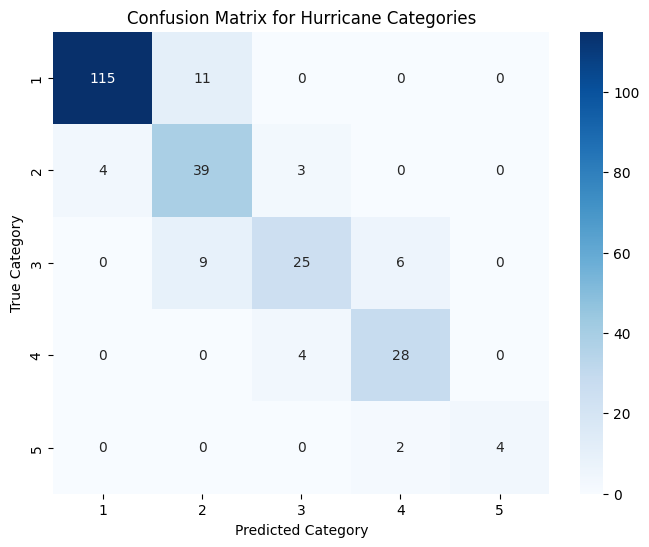

In [101]:
conf_matrix_hu = confusion_matrix(y_test_hu, y_pred_hu)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_hu, annot=True, fmt='g', cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title('Confusion Matrix for Hurricane Categories')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

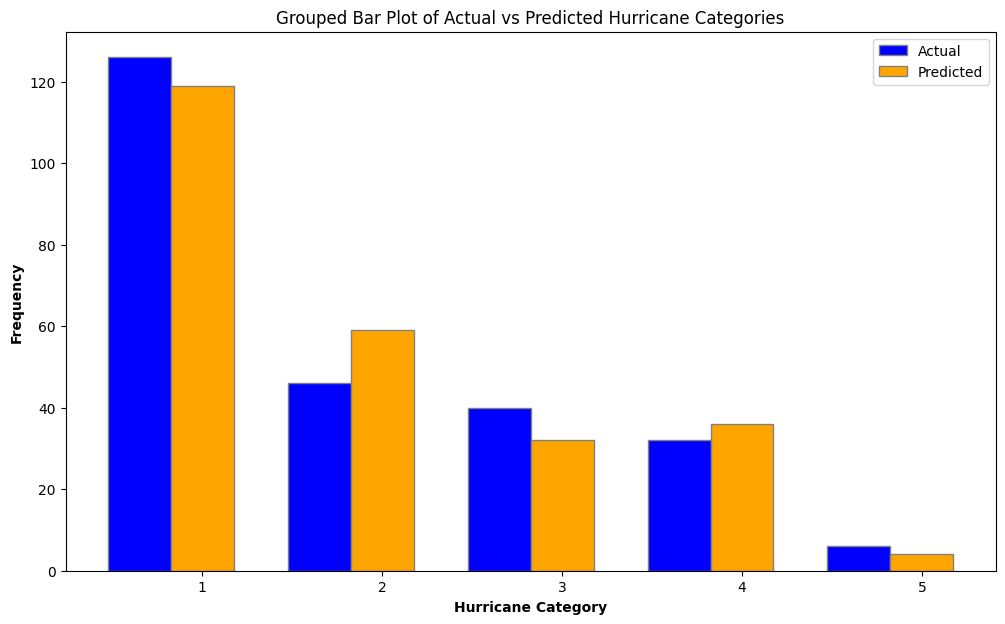

In [108]:
plot_grouped_bar(
    actual=y_test_hu,
    predicted=y_pred_hu,
    categories=np.sort(y_test_hu.unique()),
    title='Grouped Bar Plot of Actual vs Predicted Hurricane Categories',
    xlabel='Hurricane Category',
    ylabel='Frequency'
)